### here we run through calculate for all ml dataset as set in 


In [ ]:

import prepare_ml_dataset
import importlib
importlib.reload(prepare_ml_dataset)

prepare_ml_dataset.prepare_ml_dataset_batch()

### This code is for testing the load_ml_dataset.


In [ ]:

# import prepare_ml_dataset
# import importlib
# importlib.reload(prepare_ml_dataset)

# raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']

# # [51767.680, 44428.696, 38130.120, 32724.498, 28085.268, 24103.668, 20686.558, 17753.876, 15236.896, 13076.798, 11222.936, 9631.899, 8266.406, 7094.516, 6088.722, 5225.528, 4484.742
# # , 3848.919, 3303.284, 2834.964, 2433.055, 2088.129, 1792.096, 1538.062, 1319.977, 1132.846, 972.237]
# number_history_arr = [7]
# forecast_arr = ["all"]
# dL01_arr = [True]
# species_arr = ['h']
# energy_arr = ['972237']  

# for number_history in number_history_arr:
#     for forecast in forecast_arr:
#        for dL01 in dL01_arr:
#            for species in species_arr:
#                for energy in energy_arr:
               
#                     prepare_ml_dataset.prepare_ml_dataset(energy, species, recalc = True, plot_data = True, save_data = False
#                                                           , dL01=dL01, forecast = forecast, number_history =number_history, raw_feature_names =  raw_feature_names)


### All loops together is a standard routine for create all combination of training/validation/test data for a perticular raw_feature_names setting


In [ ]:

import importlib
importlib.reload(prepare_ml_dataset)

raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']

# [51767.680, 44428.696, 38130.120, 32724.498, 28085.268, 24103.668, 20686.558, 17753.876, 15236.896, 13076.798, 11222.936, 9631.899, 8266.406, 7094.516, 6088.722, 5225.528, 4484.742
# , 3848.919, 3303.284, 2834.964, 2433.055, 2088.129, 1792.096, 1538.062, 1319.977, 1132.846, 972.237]
number_history_arr = [7,8]
forecast_arr = ["all", "index","none"]
dL01_arr = [True, False]
species_arr = ['h', 'o']
energy_arr = ['972237', '51767680']  

for number_history in number_history_arr:
    for forecast in forecast_arr:
       for dL01 in dL01_arr:
           for species in species_arr:
               for energy in energy_arr:
               
                    prepare_ml_dataset.load_ml_dataset(energy, species, recalc = True, plot_data = False, save_data = False
                                                          , dL01=dL01, forecast = forecast, number_history =number_history, raw_feature_names =  raw_feature_names)


### This is the details for debugging load_ml_dataset

In [1]:
import prepare_fulldata
import importlib
import initialize_var
import prepare_ml_dataset

importlib.reload(prepare_fulldata)
importlib.reload(prepare_ml_dataset)
importlib.reload(initialize_var)

recalc = False
plot_data = True
save_data = True

raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']
number_history = 7
energy = '972237'
species = 'h'
forecast = "none"
dL01 = True
test_ts = '2017-01-01'
test_te = '2018-01-01'

dataset_csv, data_settings, directories = initialize_var.initialize_data_var(energy=energy, species=species, raw_feature_names = raw_feature_names, forecast = forecast, number_history = number_history, test_ts=test_ts, test_te=test_te, dL01=dL01)
        
df_data, directories, fulldataset_csv, fulldata_settings = prepare_fulldata.load_fulldata(energy, species, recalc = recalc, raw_feature_names = raw_feature_names, number_history = number_history, save_data = save_data, plot_data = plot_data)
        
df_full = prepare_fulldata.read_probes_data(directories["rawdata_dir"], fulldata_settings)

df_data[[fulldata_settings['doubletime_name']]] = df_full[[fulldata_settings['doubletime_name']]]

index_good = prepare_ml_dataset.get_good_index(df_full, data_settings, fulldata_settings)

if data_settings["forecast"] == "all":
    data_settings["feature_history_names"] = prepare_ml_dataset.remove_features_by_time(fulldata_settings["feature_history_names"], "*_0h")
elif data_settings["forecast"] == "index":
    data_settings["feature_history_names"] = prepare_ml_dataset.remove_index_features_by_time(fulldata_settings["feature_history_names"], "*_0h")
else:
    data_settings["feature_history_names"] = fulldata_settings["feature_history_names"]            

df_data = df_data.loc[index_good,[fulldata_settings['doubletime_name'], fulldata_settings['datetime_name'],data_settings['y_name'], data_settings['log_y_name']]+ fulldata_settings['coor_names']+fulldata_settings['feature_history_names']]

df_full = df_full.loc[index_good, :]

#-----------------------------
# After this line, both df_data and df_full only have good data. no index_good should be used.

#set test set. Here we use one year (2017) of data for test set 
index_train, index_valid, index_test = prepare_ml_dataset.create_ml_indexes(df_data,  fulldata_settings, data_settings["test_ts"], data_settings["test_te"])

# Each round, one can only train one y. If train more than one y, need to  repeat from here
x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_ml_dataset.create_ml_data(df_data, index_train, index_valid, index_test, data_settings["log_y_name"], fulldata_settings["coor_names"], data_settings["feature_history_names"])  

print("shapes of x_train, x_valid, x_test, y_train, y_valid, y_test ")
print(x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)

# if save_data:
#     prepare_ml_dataset.save_df_data(df_full[[fulldata_settings['datetime_name'], data_settings["y_name"]] + fulldata_settings["raw_coor_names"] + fulldata_settings["raw_feature_names"]], index_train, index_valid, index_test, dataset_csv)

#     prepare_ml_dataset.save_csv_data(x_train, x_valid, x_test, y_train, y_valid, y_test , dataset_csv)

   

2025-03-25 19:15:52.814867: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 19:15:52.821711: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 19:15:52.888168: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 19:15:52.946152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742944552.988444  199848 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742944553.00

output_rel05/fulldata/df_hope_log_h_flux_972237
start symh
Reading from output_rel05/fulldata/df_feature_history_scaled_symh.csv
start asyh
Reading from output_rel05/fulldata/df_feature_history_scaled_asyh.csv


start ae
Reading from output_rel05/fulldata/df_feature_history_scaled_ae.csv


start asyd
Reading from output_rel05/fulldata/df_feature_history_scaled_asyd.csv


1313856 csv data for probe b
228802 56789 59252
shapes of x_train, x_valid, x_test, y_train, y_valid, y_test 
(228802, 344) (56789, 344) (59252, 344) (228802,) (56789,) (59252,)


start plot y data
start viewdata
start plot h_flux_972237
start plot log_h_flux_972237
start plot coor data
start viewdata
start plot cos0
start plot sin0
start plot scaled_lat
start plot scaled_l
start plot feature data
start viewdata
start plot scaled_symh_2h


ValueError: x and y must be the same size

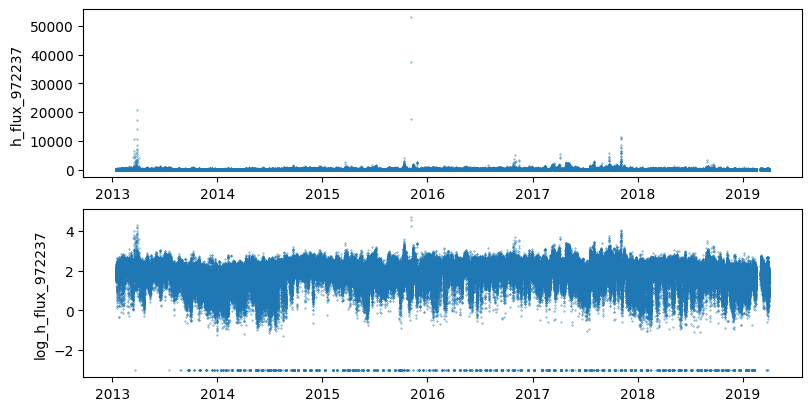

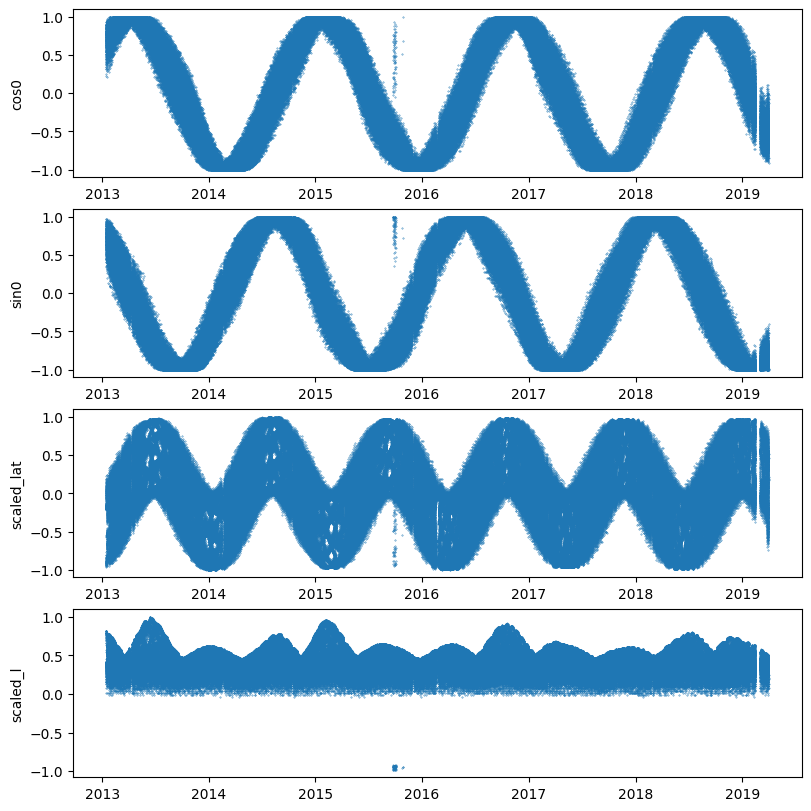

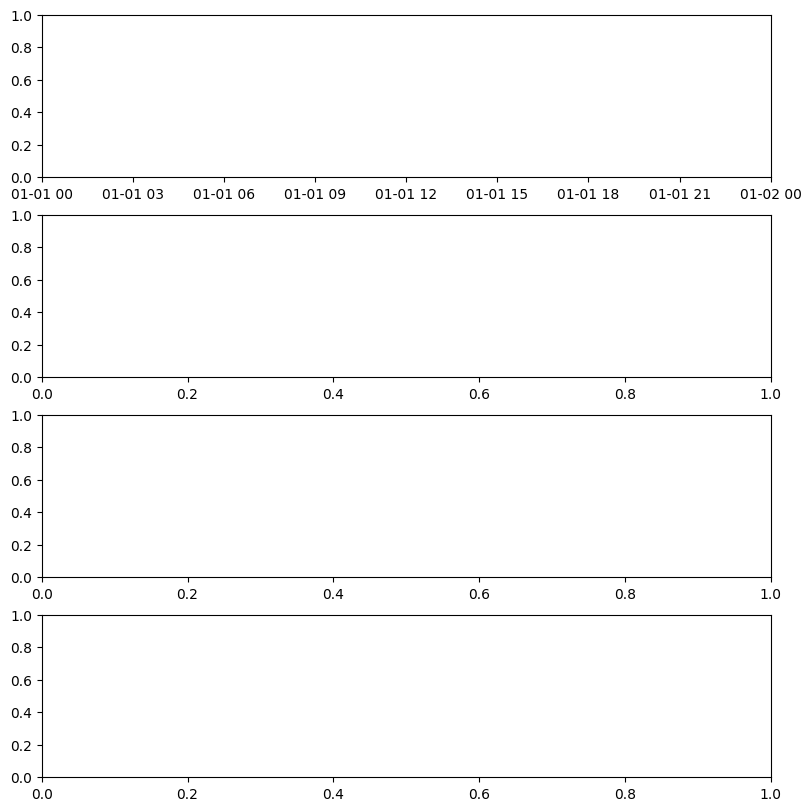

In [6]:
if plot_data:
    prepare_ml_dataset.plot_y_data(df_data[ [ fulldata_settings['datetime_name'],  data_settings["y_name"],data_settings["log_y_name"]]], data_settings["y_name"],data_settings["log_y_name"],  fulldata_settings['datetime_name'], dataset_csv["df_y"]+ '_'+ data_settings["log_y_name"])
    
    prepare_ml_dataset.plot_coor_data(df_data[[fulldata_settings['datetime_name']]+fulldata_settings["coor_names"]], fulldata_settings["coor_names"],  fulldata_settings['datetime_name'], dataset_csv["df_coor"])

    to_plot_feature_name = [s + "_2h" for s in fulldata_settings["feature_names"]]
    prepare_ml_dataset.plot_feature_data(df_data[[fulldata_settings['datetime_name']] + to_plot_feature_name], to_plot_feature_name, to_plot_feature_name, dataset_csv["df_feature"])


In [9]:
dataset_csv["df_coor"]

'output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastnone/df_coor.csv'

In [5]:
df_data[[fulldata_settings['datetime_name']] + to_plot_feature_name]

,DateTime,scaled_symh_2h,scaled_asyh_2h,scaled_ae_2h,scaled_asyd_2h
3866,2013-01-14 10:12:30,0.365508,-0.929885,-0.957050,-0.968338
3869,2013-01-14 10:27:30,0.369369,-0.932184,-0.951540,-0.951451
3872,2013-01-14 10:42:30,0.377091,-0.909195,-0.903890,-0.934565
3874,2013-01-14 10:52:30,0.388674,-0.864368,-0.823339,-0.925066
3876,2013-01-14 11:02:30,0.388674,-0.858621,-0.766937,-0.927177
...,...,...,...,...,...
1313790,2019-03-31 18:32:30,0.438867,-0.806897,-0.917990,-0.884960
1313792,2019-03-31 18:42:30,0.444015,-0.801149,-0.917180,-0.870185
1313797,2019-03-31 19:07:30,0.445302,-0.782759,-0.954295,-0.842744
1313849,2019-03-31 23:27:30,0.409266,-0.934483,-0.931118,-0.902902


In [ ]:
to_plot_feature_name = [s + "_2h" for s in fulldata_settings["feature_names"]]
to_plot_feature_name

In [ ]:
df_data[ [fulldata_settings['datetime_name']]+fulldata_settings["feature_names"]+"_0h" ]

In [ ]:
to_plot_feature_name